In [2]:
import json
import numpy as np
import pandas as pd
import requests
import datetime
def crawl_price(stock_id):

    d = datetime.datetime.now()
    url = "https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=0&period2="+str(int(d.timestamp()))+"&interval=1d&events=history&=hP2rOschxO0"

    res = requests.get(url)
    data = json.loads(res.text)
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
    return df
df1 = crawl_price("0050.TW")

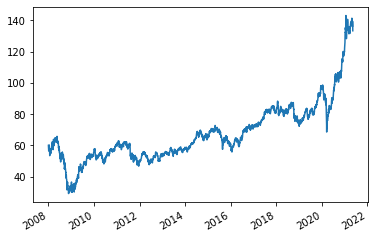

In [3]:
df1.close.plot()

In [4]:
url = "https://www.tradingview.com/markets/stocks-taiwan/market-movers-large-cap/"
response = requests.get(url)


In [5]:
import io

In [6]:
f = io.StringIO(response.text)
dfs = pd.read_html(f)
TW100 = dfs[0]

In [7]:
TW100.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2330 TAIWAN SEMICONDUCTOR MANUFACTURING,571.0,-3.06%,-18.0,Sell,64.814M,15532.300B,—,20.85,56831.00,Electronic Technology
1,2454 MEDIATEK INC,911.0,-6.95%,-68.0,Sell,25.261M,1677.400B,—,38.54,—,Electronic Technology
2,2317 HON HAI PRECISION INDUSTRY,107.0,-5.31%,-6.0,Sell,81.062M,1628.730B,15.56,7.34,—,Electronic Technology
3,6505 FORMOSA PETROCHEMICAL CORPORATION,104.0,-3.26%,-3.5,Buy,10.567M,1000.230B,28.99,3.71,—,Energy Minerals
4,2412 CHUNGHWA TELECOM,114.5,0.44%,0.5,Strong Buy,11.135M,880.471B,26.08,4.37,—,Communications
5,2 2308 DELTA ELECTRONIC,271.0,-5.74%,-16.5,Sell,13.681M,762.378B,24.97,11.55,—,Electronic Technology
6,2882 CATHAY FINANCIAL HLDG CO,56.6,-2.75%,-1.6,Buy,142.872M,725.623B,10.77,5.41,57848.00,Finance
7,2881 FUBON FINANCIAL HLDG CO LTD,74.8,-2.35%,-1.8,Buy,95.962M,724.539B,—,11.23,—,Finance
8,1303 NAN YA PLASTIC,85.9,-3.48%,-3.1,Sell,10.877M,702.671B,—,5.34,—,Process Industries
9,2303 UNITED MICRO ELECTRONICS,49.0,-6.67%,-3.5,Sell,284.290M,670.788B,17.29,3.06,—,Electronic Technology


In [49]:
import time
TW50_history = {}
for i in range (50):
    #print(TW100["Unnamed: 0"][i])
    tmp = TW100["Unnamed: 0"][i].split()
    t=0
    while len(tmp[t])!=4:
      t+=1
    number = tmp[t]
    #print(number)
    name=""
    for i in range(t+1,len(tmp)):
      name+=tmp[i]+" "
    #print(name)
    TW50_history[name]=crawl_price(number+".TW")
    print(name,number)
    #time.sleep(5)

TAIWAN SEMICONDUCTOR MANUFACTURING  2330
MEDIATEK INC  2454
HON HAI PRECISION INDUSTRY  2317
FORMOSA PETROCHEMICAL CORPORATION  6505
CHUNGHWA TELECOM  2412
DELTA ELECTRONIC  2308
CATHAY FINANCIAL HLDG CO  2882
FUBON FINANCIAL HLDG CO LTD  2881
NAN YA PLASTIC  1303
UNITED MICRO ELECTRONICS  2303
FORMOSA PLASTIC  1301
CHINA STEEL CORP  2002
FORMOSA CHEMICAL & FIBRE CO  1326
ASE TECHNOLOGY HOLDING CO LTD  3711
CTBC FINANCIAL HOLDINGS COMPANY LTD  2891
EVERGREEN MARINE CORP(TAIWAN)  2603
MEGA FINANCIAL HOLDING CO  2886
UNI-PRESIDENT ENTERPRISES CORP  1216
LARGAN PRECISION CO  3008
QUANTA COMPUTER  2382
NOVATEK MICROELECTRONICS  3034
E SUN FINANCIAL HOLDINGS  2884
HOTAI MOTOR CO  2207
YUANTA FINANCIAL HOLDING CO. LTD.  2885
TAIWAN CEMENT  1101
SILERGY CORP  6415
ASUSTEK COMPUTER INC  2357
YANG MING MARINE TRANSPORT CORP  2609
FIRST FINANCIAL HOLDING CO LTD  2892
TAIWAN COOPERATIVE FINANCIAL HLDGS  5880
TAIWAN MOBILE CO  3045
PRESIDENT CHAIN STORE CORP  2912
CHAILEASE HOLDING COMPANY LIMITED

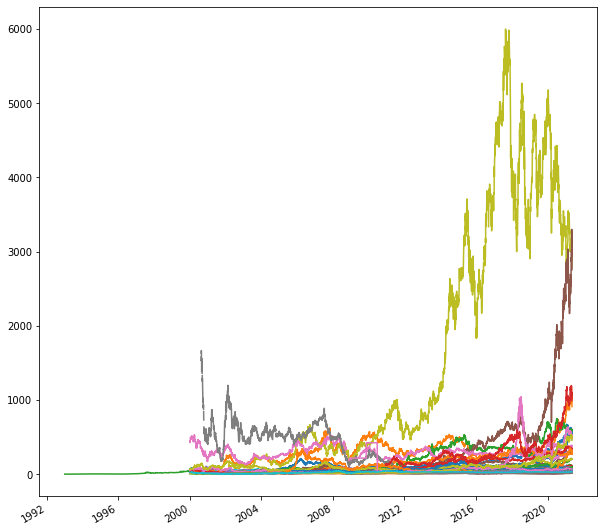

In [50]:
for name, history in TW50_history.items():
    history.close.plot()

In [51]:
close = {}
for name, price in TW50_history.items():
    if len(price) != 0:
        close[name] = price['close']

close = pd.DataFrame(close)
close = close.resample('1d').last().dropna(how='all', axis=1).dropna(how='all', axis=0)

In [52]:
corr = close.corr()
print(corr)

                                      TAIWAN SEMICONDUCTOR MANUFACTURING   ...  FAR EASTERN NEW CENTURY CORPORATION 
TAIWAN SEMICONDUCTOR MANUFACTURING                               1.000000  ...                              0.311897
MEDIATEK INC                                                     0.575898  ...                              0.569111
HON HAI PRECISION INDUSTRY                                       0.516091  ...                              0.717680
FORMOSA PETROCHEMICAL CORPORATION                                0.535941  ...                              0.610905
CHUNGHWA TELECOM                                                 0.689468  ...                              0.722264
DELTA ELECTRONIC                                                 0.768100  ...                              0.638075
CATHAY FINANCIAL HLDG CO                                         0.174858  ...                              0.290444
FUBON FINANCIAL HLDG CO LTD                                     

In [53]:
pip install sns

In [54]:
import seaborn as sns
#sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

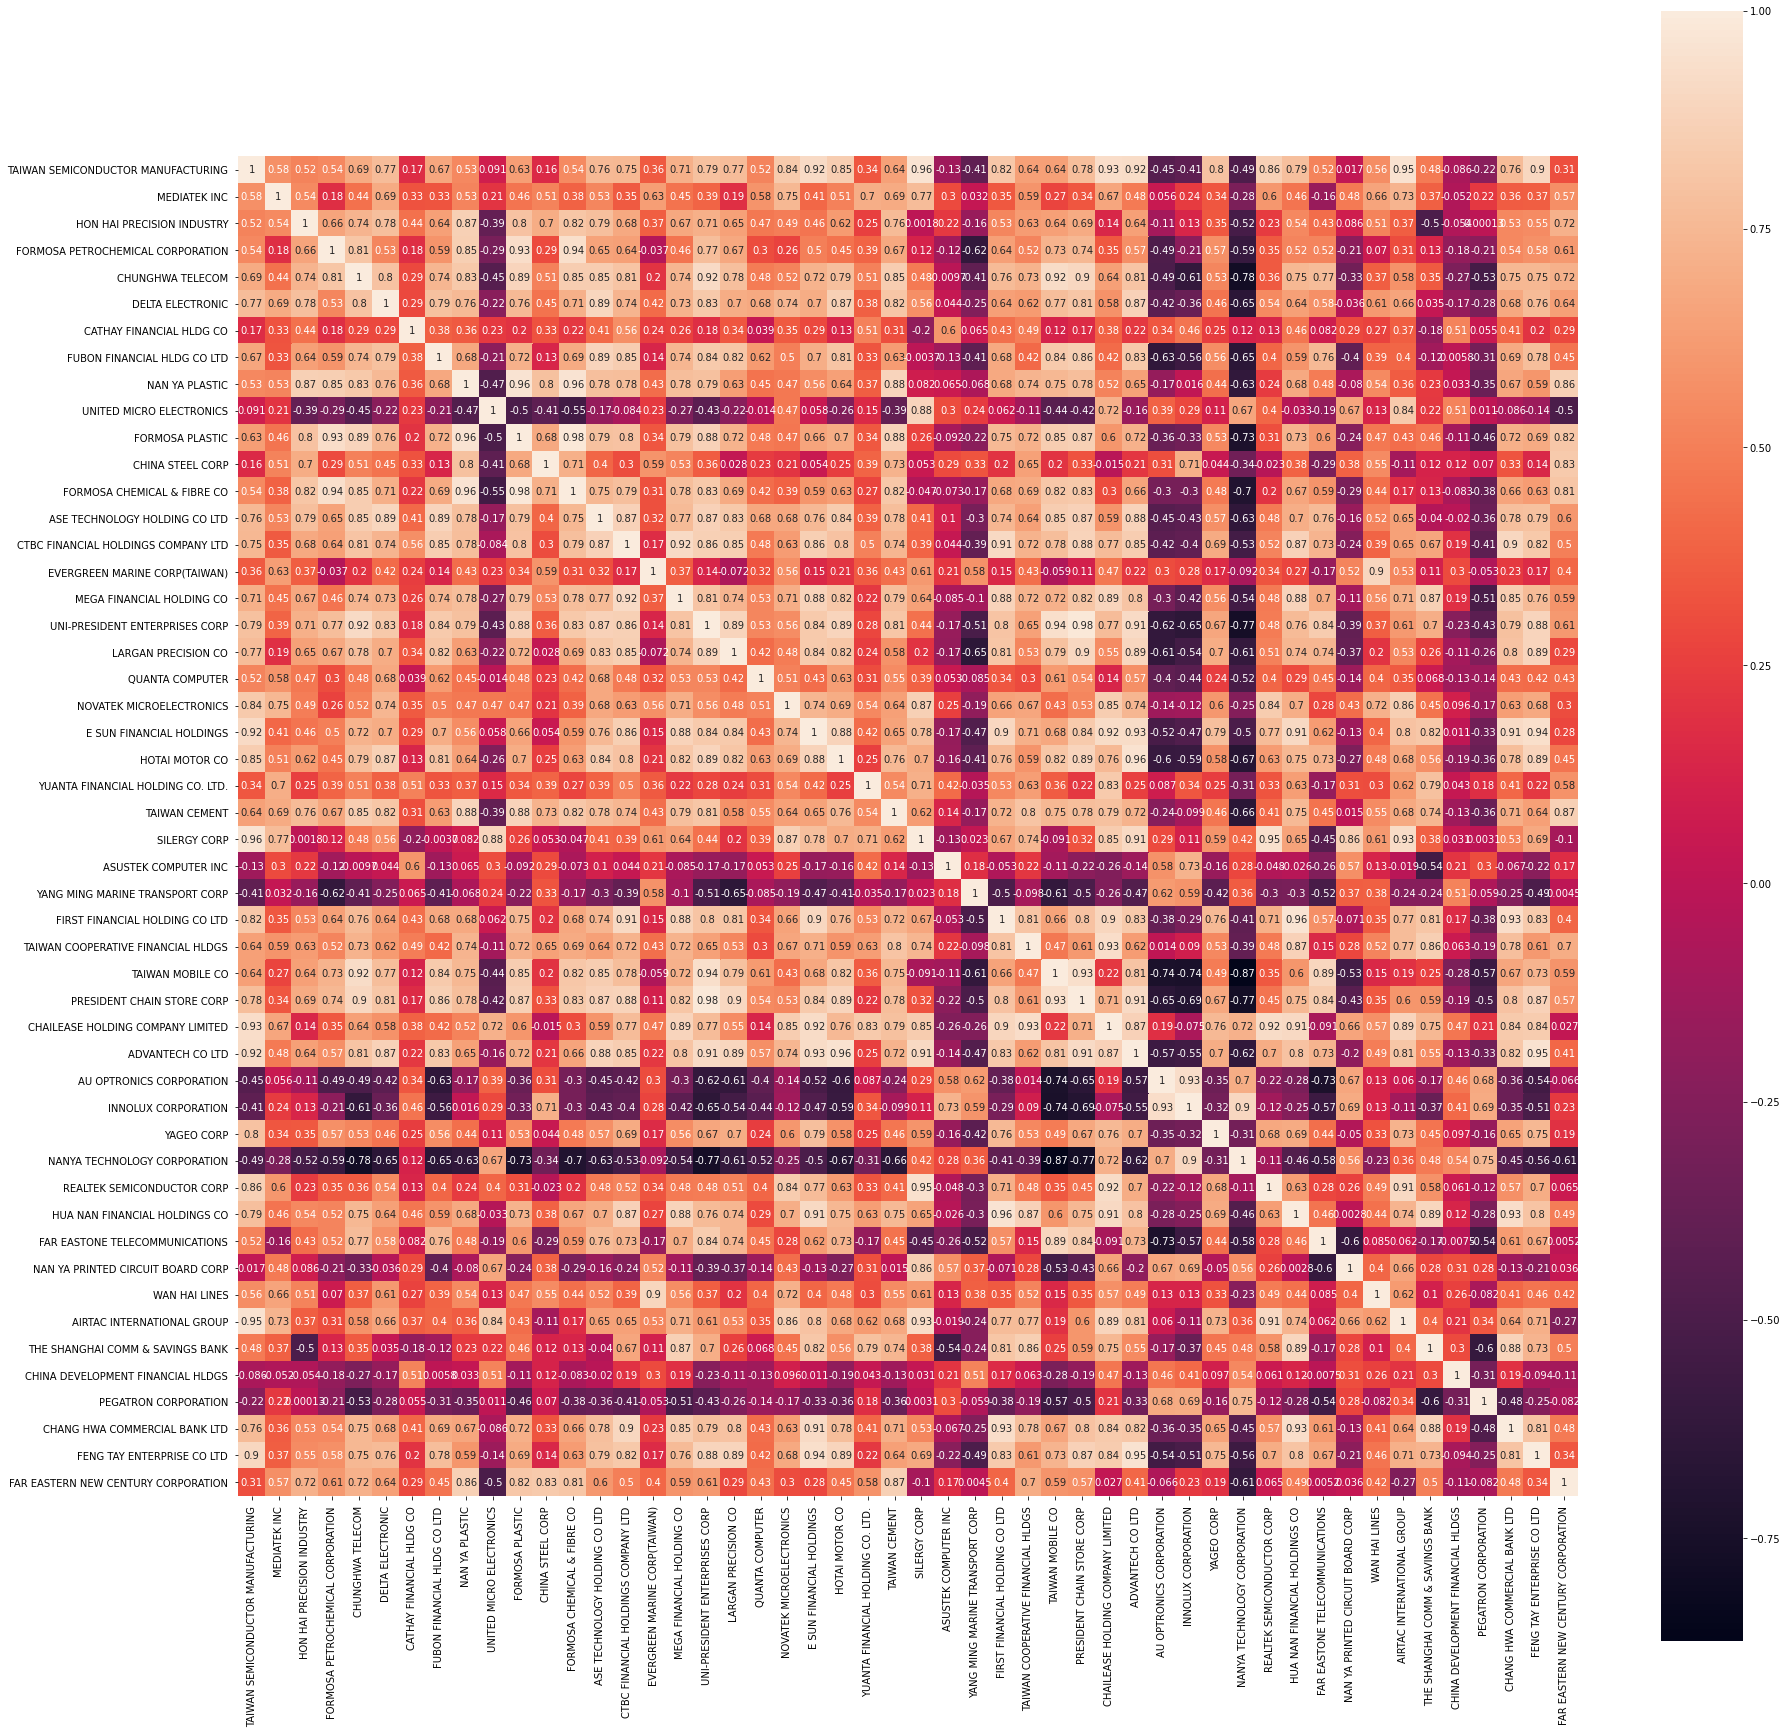

In [55]:
# set figure size
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 30)

# original code
import seaborn as sns
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

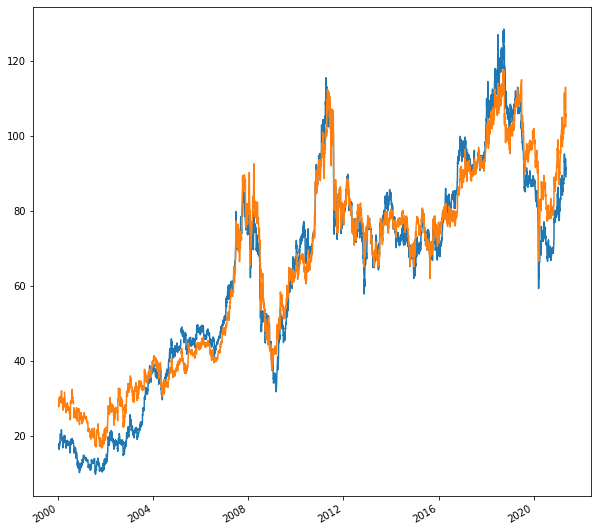

In [76]:
plt.rcParams['figure.figsize'] = (10, 10)
first = TW50_history["FORMOSA CHEMICAL & FIBRE CO "].close
second = TW50_history["FORMOSA PLASTIC "].close

first.plot()
second.plot()


In [78]:
new = first
for i in range(len(first)):
  new[i]=first[i]/second[i]

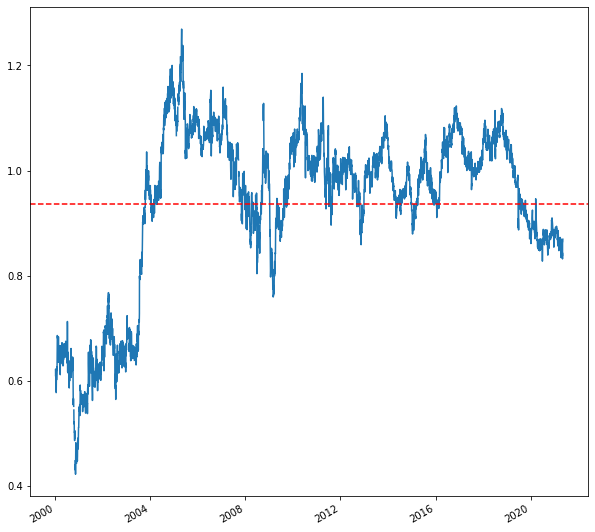

In [87]:
new.plot()
plt.axhline(y = new.mean(), color = 'r', linestyle = '--')